In [1]:
import pandas as pd
import numpy as np
import sqlite3 as sq3
from pylab import mpl, plt

# Yahoo finance
import yfinance as yf

# Datetime
import datetime as dt
from datetime import datetime
from datetime import timedelta

In [2]:
SMA = 25
threshold = 3.5

In [3]:
start=pd.to_datetime('1990-01-01', format='%Y-%m-%d')
today_date = datetime.today().strftime('%Y-%m-%d')

In [4]:
df = yf.download("JPY=x", start=start,end=today_date)

[*********************100%%**********************]  1 of 1 completed


In [5]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1996-10-30,114.370003,114.480003,113.610001,114.180000,114.180000,0
1996-11-01,113.500000,113.500000,113.500000,113.500000,113.500000,0
1996-11-04,113.279999,113.980003,112.949997,113.879997,113.879997,0
1996-11-05,113.709999,114.330002,113.449997,114.250000,114.250000,0
1996-11-06,114.230003,114.680000,113.650002,113.949997,113.949997,0
...,...,...,...,...,...,...
2024-08-09,147.669006,147.735992,146.311996,147.669006,147.669006,0
2024-08-12,147.042007,148.201004,146.699005,147.042007,147.042007,0
2024-08-13,146.981995,147.929993,146.910995,146.981995,146.981995,0


In [6]:
df['returns'] = np.log(df['Close'] / df['Close'].shift(1))
print(df)

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
1996-10-30  114.370003  114.480003  113.610001  114.180000  114.180000   
1996-11-01  113.500000  113.500000  113.500000  113.500000  113.500000   
1996-11-04  113.279999  113.980003  112.949997  113.879997  113.879997   
1996-11-05  113.709999  114.330002  113.449997  114.250000  114.250000   
1996-11-06  114.230003  114.680000  113.650002  113.949997  113.949997   
...                ...         ...         ...         ...         ...   
2024-08-09  147.669006  147.735992  146.311996  147.669006  147.669006   
2024-08-12  147.042007  148.201004  146.699005  147.042007  147.042007   
2024-08-13  146.981995  147.929993  146.910995  146.981995  146.981995   
2024-08-14  146.970993  147.552002  146.080994  146.970993  146.970993   
2024-08-15  147.253006  149.263000  147.063004  147.253006  147.253006   

            Volume   returns  
Date  

In [7]:
df['SMA'] = df['Close'].rolling(SMA).mean()

In [8]:
df['distance'] = df['Close'] - df['SMA']

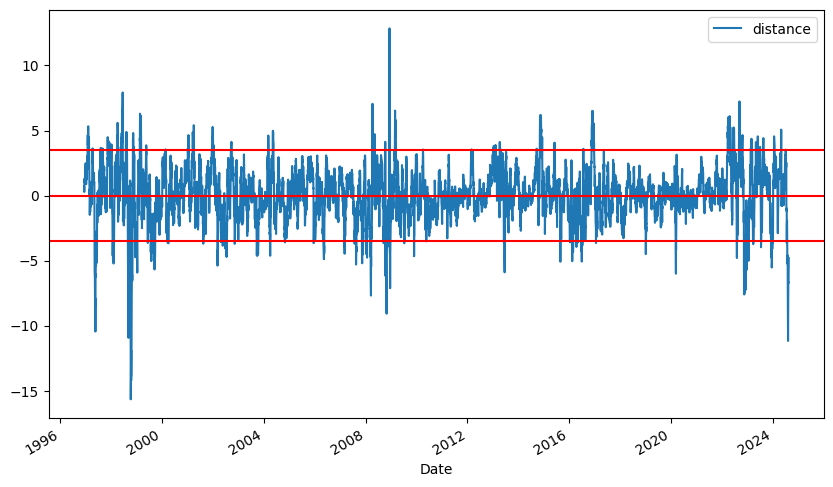

In [9]:
df['distance'].dropna().plot(figsize=(10, 6), legend=True)
plt.axhline(threshold, color='r')
plt.axhline(-threshold, color='r')
plt.axhline(0, color='r');

In [10]:
df['position'] = np.where(df['distance'] > threshold,-1, np.nan)
df['position'] = np.where(df['distance'] < -threshold,1, df['position'])
df['position'] = np.where(df['distance'] *df['distance'].shift(1) < 0, 0, df['position'])
df['position'] = df['position'].ffill().fillna(0)

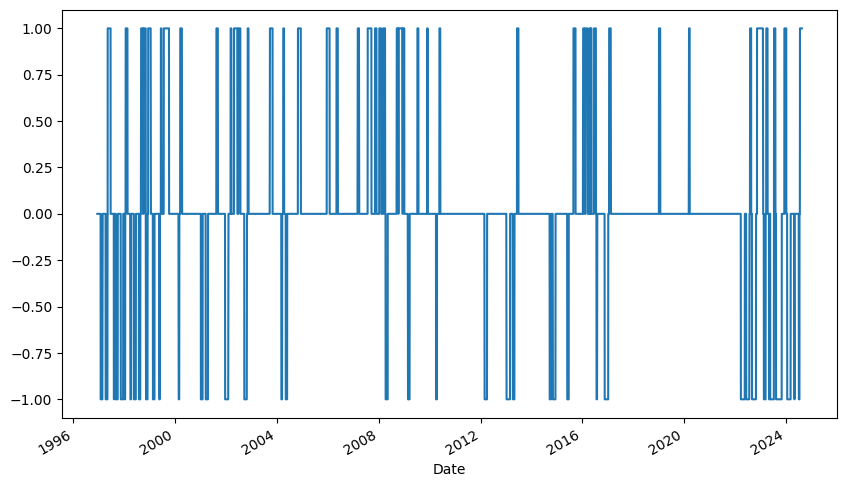

In [11]:
df['position'].iloc[SMA:].plot(ylim=[-1.1, 1.1],figsize=(10, 6));


In [12]:
df['strategy'] = df['position'].shift(1) * df['returns']

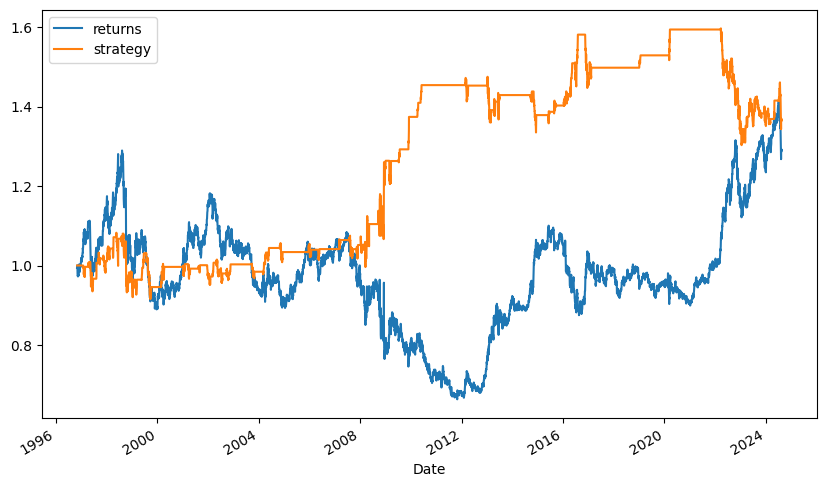

In [13]:
df[['returns', 'strategy']].dropna().cumsum().apply(np.exp).plot(figsize=(10, 6));